In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [145]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [13]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [14]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

**Dropping Coloumns that seems unnecessary for analysis**

In [20]:
df1=matches.drop(labels=['umpire1','umpire2','umpire3'],axis=1)
df1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla


**1.How many matches we've got in the dataset?**


In [39]:
df1.groupby('season').season.count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
Name: season, dtype: int64

In [72]:
a=df1['id'].nunique()
print("Total matches in the dataset =",a)

Total matches in the dataset = 636


**2.How many seasons we've got in the dataset?**


In [78]:
b=df1['season'].nunique()
print("Total season in the dataset =",b)

Total season in the dataset = 10


**3.Which Team had won by maximum runs?**


In [131]:
maxr=df1.groupby('winner').win_by_runs.max()
maxr

winner
Chennai Super Kings             97
Deccan Chargers                 82
Delhi Daredevils                97
Gujarat Lions                    1
Kings XI Punjab                111
Kochi Tuskers Kerala            17
Kolkata Knight Riders          140
Mumbai Indians                 146
Pune Warriors                   38
Rajasthan Royals               105
Rising Pune Supergiant          61
Rising Pune Supergiants         34
Royal Challengers Bangalore    144
Sunrisers Hyderabad             85
Name: win_by_runs, dtype: int64

In [90]:
df1.loc[df1['win_by_runs']==df['win_by_runs'].max(),['winner','win_by_runs']]

,winner,win_by_runs
43,Mumbai Indians,146


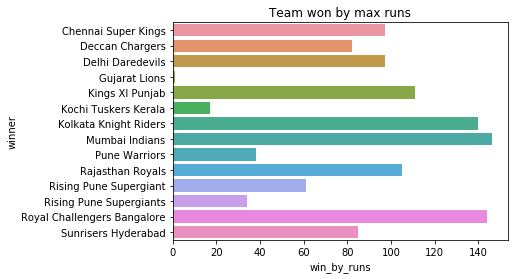

In [138]:
sns.barplot(y=maxr.index,x=maxr,ci=None)
plt.title("Team won by max runs")
plt.show()

**4.Which Team had won by maximum wicket?**


In [140]:
maxw=df1.groupby('winner').win_by_wickets.max()
maxw

winner
Chennai Super Kings            10
Deccan Chargers                10
Delhi Daredevils               10
Gujarat Lions                   7
Kings XI Punjab                10
Kochi Tuskers Kerala            8
Kolkata Knight Riders          10
Mumbai Indians                 10
Pune Warriors                   7
Rajasthan Royals               10
Rising Pune Supergiant          9
Rising Pune Supergiants         9
Royal Challengers Bangalore    10
Sunrisers Hyderabad            10
Name: win_by_wickets, dtype: int64

In [141]:
df1.loc[df1['win_by_wickets']==df['win_by_wickets'].max(),['winner','win_by_wickets']]

,winner,win_by_wickets
2,Kolkata Knight Riders,10
34,Kings XI Punjab,10
71,Deccan Chargers,10
119,Delhi Daredevils,10
183,Royal Challengers Bangalore,10
298,Rajasthan Royals,10
376,Mumbai Indians,10
390,Chennai Super Kings,10
542,Royal Challengers Bangalore,10
590,Sunrisers Hyderabad,10


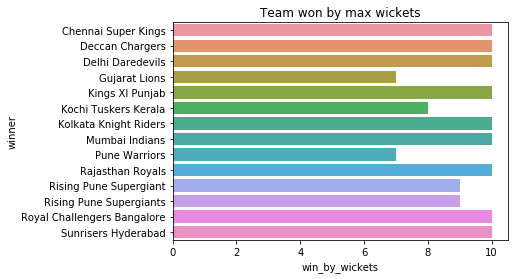

In [143]:
sns.barplot(y=maxw.index,x=maxw,ci=None)
plt.title("Team won by max wickets")
plt.show()

**5.Which Team had won by closest Margin (minimum runs)?**


In [259]:
d=df1.loc[df1['win_by_runs']>0,['winner','win_by_runs']]
d1=d.groupby(by='winner').win_by_runs.min()
d1

winner
Chennai Super Kings             1
Deccan Chargers                 6
Delhi Daredevils                1
Gujarat Lions                   1
Kings XI Punjab                 1
Kochi Tuskers Kerala            6
Kolkata Knight Riders           2
Mumbai Indians                  1
Pune Warriors                   7
Rajasthan Royals                2
Rising Pune Supergiant          3
Rising Pune Supergiants        19
Royal Challengers Bangalore     1
Sunrisers Hyderabad             4
Name: win_by_runs, dtype: int64

In [161]:
df1.loc[df['win_by_runs']==1,['winner','win_by_runs']]

,winner,win_by_runs
58,Mumbai Indians,1
105,Kings XI Punjab,1
163,Kings XI Punjab,1
344,Delhi Daredevils,1
350,Mumbai Indians,1
518,Chennai Super Kings,1
598,Gujarat Lions,1
614,Royal Challengers Bangalore,1


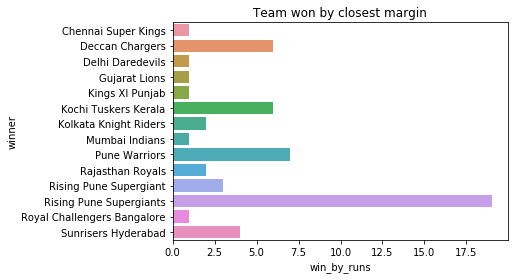

In [261]:
sns.barplot(x=d1,y=d1.index,ci=None)
plt.title("Team won by closest margin")
plt.show()

**6.Which Team had won by minimum wicket?**


In [253]:
d=df1.loc[df1['win_by_wickets']>0,['winner','win_by_wickets']]
d1=d.groupby(by='winner').win_by_wickets.min()
d1

winner
Chennai Super Kings            3
Deccan Chargers                5
Delhi Daredevils               2
Gujarat Lions                  3
Kings XI Punjab                3
Kochi Tuskers Kerala           7
Kolkata Knight Riders          1
Mumbai Indians                 2
Pune Warriors                  4
Rajasthan Royals               3
Rising Pune Supergiant         4
Rising Pune Supergiants        4
Royal Challengers Bangalore    2
Sunrisers Hyderabad            3
Name: win_by_wickets, dtype: int64

In [254]:
df1.loc[df['win_by_wickets']==1,['winner','win_by_wickets']]

,winner,win_by_wickets
559,Kolkata Knight Riders,1


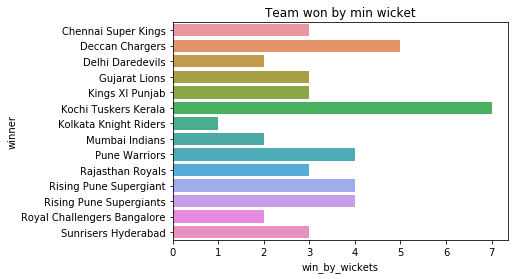

In [258]:
sns.barplot(x=d1,y=d1.index,ci=None)
plt.title("Team won by min wicket")
plt.show()

**7.Which Season had most number of matches?**


In [306]:
x=pd.DataFrame(df1.groupby('season').season.count())
x[x['season']==x['season'].max()]


,season
season,
2013,76


In [295]:
a=df1.groupby('season').season.count()
b=a.idxmax()
c=a.max()
print(f"The Season {b} has maximum number of {c} matches")

The Season 2013 has maximum number of 76 matches


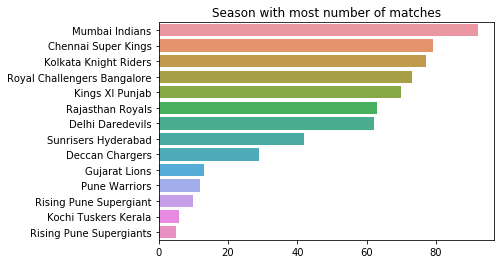

In [315]:
sns.barplot(x=a.values,y=a.index)
plt.title("Season with most number of matches")
plt.show()

**8.Which IPL Team is more successful?**


In [204]:
df1.groupby('winner').winner.count()

winner
Chennai Super Kings            79
Deccan Chargers                29
Delhi Daredevils               62
Gujarat Lions                  13
Kings XI Punjab                70
Kochi Tuskers Kerala            6
Kolkata Knight Riders          77
Mumbai Indians                 92
Pune Warriors                  12
Rajasthan Royals               63
Rising Pune Supergiant         10
Rising Pune Supergiants         5
Royal Challengers Bangalore    73
Sunrisers Hyderabad            42
Name: winner, dtype: int64

In [307]:
a=pd.DataFrame(df1.groupby('winner').winner.count())
a[a['winner']==a['winner'].max()]


,winner
winner,
Mumbai Indians,92


In [311]:
a=df1['winner'].value_counts()
b=a.idxmax()
c=a.max()
print(f"The team {b} has {c} successful matches")

The team Mumbai Indians has 92 successful matches


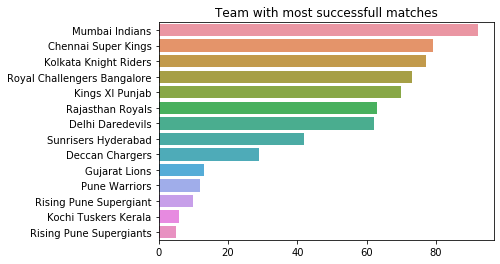

In [317]:
sns.barplot(x=a.values,y=a.index)
plt.title("Team with most successfull matches")
plt.show()

**9.Has Toss-winning helped in winning matches?**


In [214]:
df1.groupby(['winner']).winner.count()

winner
Chennai Super Kings            79
Deccan Chargers                29
Delhi Daredevils               62
Gujarat Lions                  13
Kings XI Punjab                70
Kochi Tuskers Kerala            6
Kolkata Knight Riders          77
Mumbai Indians                 92
Pune Warriors                  12
Rajasthan Royals               63
Rising Pune Supergiant         10
Rising Pune Supergiants         5
Royal Challengers Bangalore    73
Sunrisers Hyderabad            42
Name: winner, dtype: int64

In [235]:
df1.groupby(by=['winner','toss_winner']).toss_winner.count()

winner               toss_winner                
Chennai Super Kings  Chennai Super Kings            42
                     Deccan Chargers                 2
                     Delhi Daredevils                4
                     Kings XI Punjab                 3
                     Kolkata Knight Riders           6
                                                    ..
Sunrisers Hyderabad  Mumbai Indians                  4
                     Pune Warriors                   2
                     Rajasthan Royals                2
                     Royal Challengers Bangalore     4
                     Sunrisers Hyderabad            17
Name: toss_winner, Length: 114, dtype: int64

In [319]:
df1['Toss_Match_win']=df1.apply(lambda x:1 if x.toss_winner==x.winner else 0, axis=1)

In [333]:
d=df1.groupby('Toss_Match_win').Toss_Match_win.count()
print("The total number of matches won by a team who won the toss=",d.max())
print("The total number of matches lost by a team who won the toss=",d.min())

The total number of matches won by a team who won the toss= 325
The total number of matches lost by a team who won the toss= 311


In [330]:
a=round(df1['Toss_Match_win'].mean()*100,2)
print(f"The probability of team winning when the team wins the toss is: {a}%")

The probability of team winning when the team wins the toss is: 51.1%


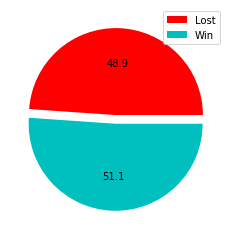

In [353]:
labels=['Lost','Win']
plt.pie(x=d,autopct="%0.1f",explode=[0,0.1],colors='rc')
plt.legend(labels,loc=1)
plt.show()